In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import *
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.utils import check_array
from sklearn.cluster import AgglomerativeClustering
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
import nltk
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy import sparse
import functools
import re
import missingno as mns
import warnings


pd.set_option('display.max_columns', 300)
nltk.download('stopwords')
stop_words=stopwords.words('english')
warnings.filterwarnings('ignore')

#statsmodels.api as sm (read on how to use this module)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
stroke=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [36]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [37]:
stroke.shape

(5110, 12)

In [38]:
stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [39]:
print("Min value of BMI: ",stroke.bmi.min())
print("Max value of BMI: ",stroke.bmi.max())
# Both of them are not compatible with life.

Min value of BMI:  10.3
Max value of BMI:  97.6


In [40]:
print('Mean value of BMI: ',stroke.bmi.mean())

Mean value of BMI:  28.893236911794673


In [41]:
#To fill, you target the columns that have missing values
stroke['bmi']=stroke['bmi'].fillna(stroke['bmi'].dropna().mean())

In [42]:
stroke.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [43]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [44]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [45]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Question 1. Plot a graph to show Age Group Distribution

In [46]:
# Since there is no comparison to be made in the graph, we'll use histogram 

In [47]:
#sns.set(rc={'figure.figsize':(20,30)})
#plt.xticks(fontsize=15,rotation='vertical')
#sns.countplot(y='age',data=stroke)
#set_title("AGE GROUP DISTRIBUTION",fontsize=30)

<AxesSubplot:title={'center':'AGE DISTRIBUTION'}, xlabel='age'>

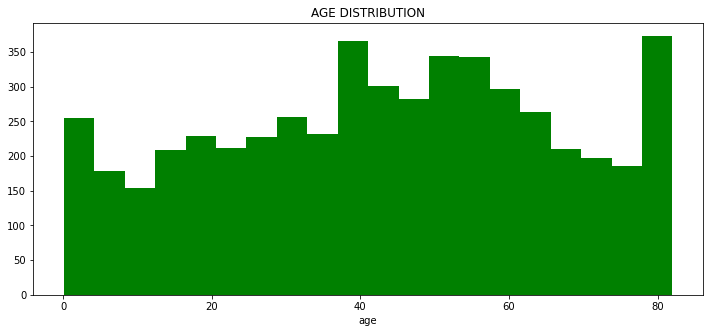

In [74]:
#sns.set_style='White'
plt.figure(figsize=(12,5))
plt.title("AGE DISTRIBUTION")
sns.distplot(stroke['age'],color='g',kde=False,hist_kws={'alpha':1})

# Question 2. Plot a graph to show Gender Distribution

In [82]:
#fig=px.histogram(x=stroke['gender'],title='GENDER DISTRIBUTION',marginal='violin')
#fig.show()

No handles with labels found to put in legend.


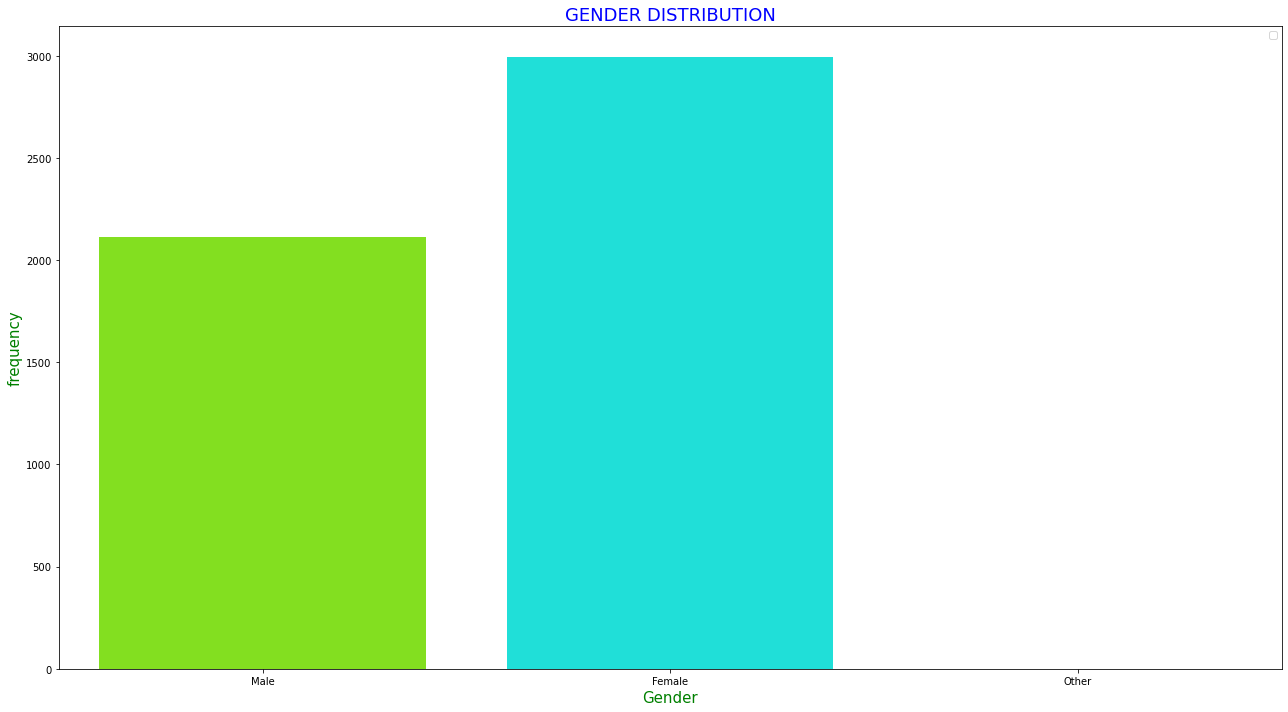

In [83]:
#sns.set_style='White'
#plt.figure(figsize=(12,5))
#plt.title("GENDER DISTRIBUTION")
#sns.distplot(stroke['gender'],color='m',hist_kws={'alpha':1})

plt.figure(figsize=(18,10))
# make countplot
sns.countplot(x='gender',# y="Goals_scored",
            data=stroke,
#            hue='Club',
            palette='hsv')
#            order=ca.sort_values('Goals_scored',ascending=False).Playing_Position)#in descending order
#           order=ca.sort_values('Goals_scored').Playing_Position)#in ascending order
# set labels
plt.ylabel("frequency",color='g',size=15)
plt.xlabel("Gender",color='g',size=15)
plt.title("GENDER DISTRIBUTION",color='b',size=18)
plt.tight_layout()
plt.legend()
#plt.savefig("RonaldoTGSPtype_barplot_Seaborn_Python.png", dpi=100)


# Question 3. Plot a graph to show Hypertension Distribution

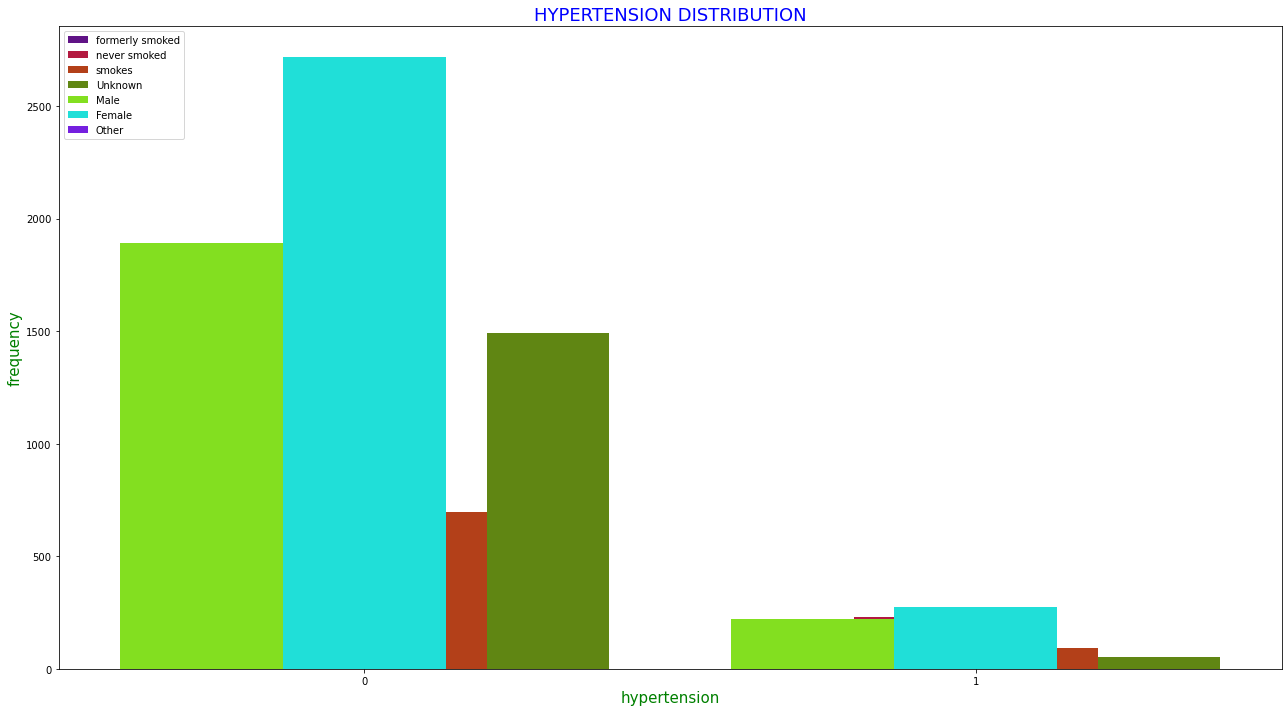

In [105]:
plt.figure(figsize=(18,10))
# make countplot
sns.countplot(x='hypertension',# y="Goals_scored",
            data=stroke,
            palette='brg',
             hue='smoking_status')
sns.countplot(x='hypertension',# y="Goals_scored",
            data=stroke,
            palette='hsv',
            hue='gender')
# set labels
plt.ylabel("frequency",color='g',size=15)
plt.xlabel("hypertension",color='g',size=15)
plt.title("HYPERTENSION DISTRIBUTION",color='b',size=18)
plt.tight_layout()
plt.legend()
#plt.savefig("Hypertension_dist_countplot_Seaborn_Python.png", dpi=100)


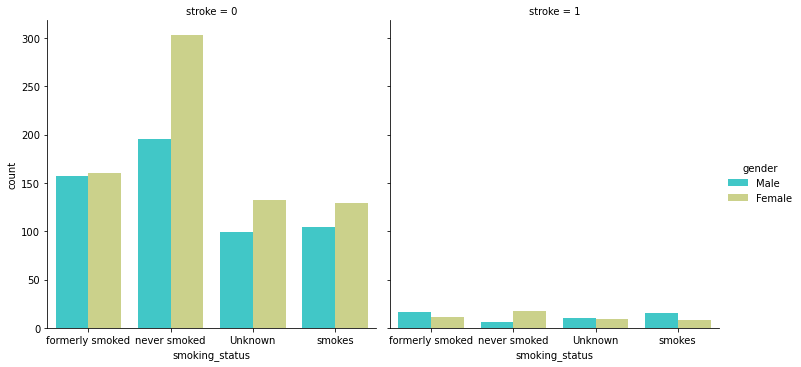

In [108]:
sns.catplot(x='smoking_status',kind='count',col='stroke',
            data=stroke[(stroke['age']>50) & (stroke['age']<70)],
            palette='rainbow',hue='gender')
plt.savefig("Hypertension_dist_catplot_Seaborn_Python.png", dpi=100)

In [109]:
#fig=px.histogram(x=stroke['hypertension'],title='HYPERTENSION DISTRIBUTION',marginal='violin')
#fig.show()

# Question 4.Plot a graph to show Heart disease Distribution

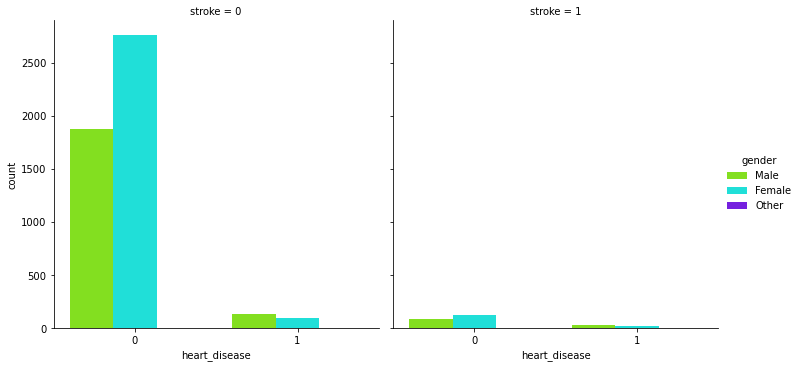

In [114]:
sns.catplot(x='heart_disease',kind='count',col='stroke',hue='gender',data=stroke,palette="hsv")
plt.savefig("Heart_disease_dist_catplot_Seaborn_Python.png", dpi=100)

In [115]:
#fig=px.histogram(stroke['heart_disease'],title='HEART DISEASE DISTRIBUTION',marginal='violin')
#fig.show()

# Question 5. Plot a graph to show Work type Distribution

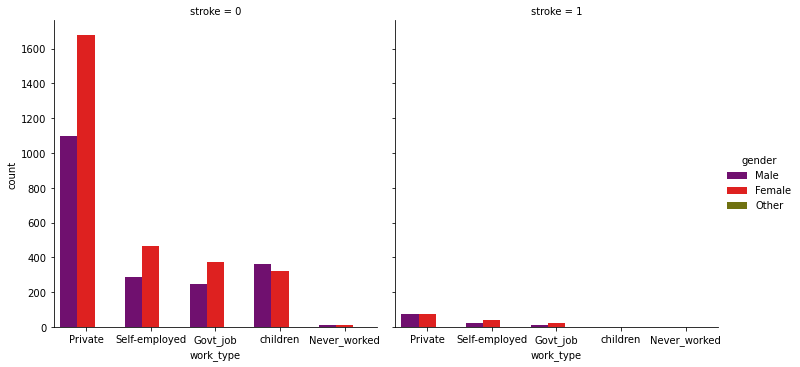

In [119]:
sns.catplot(x='work_type',kind='count',col='stroke',hue='gender',data=stroke,palette="brg")
plt.savefig("Work_type_dist_catplot_Seaborn_Python.png", dpi=100)

In [120]:
#fig=px.histogram(stroke['work_type'],title='WORK TYPE DISTRIBUTION',marginal='violin')
#fig.show()

# Question 6. Plot a graph to show Smoking Status Distribution

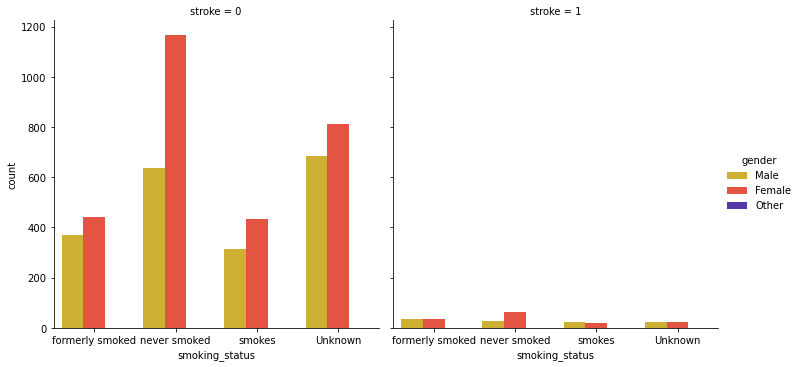

In [127]:
sns.catplot(x='smoking_status',kind='count',col='stroke',hue='gender',data=stroke,palette="CMRmap_r")
plt.savefig("Work_type_dist_catplot_Seaborn_Python.png", dpi=100)

In [128]:
#fig=px.histogram(stroke['smoking_status'],title='SMOKING STATUS DISTRIBUTION',marginal='violin')
#fig.show()

# Question 7. Build a model for this data set to see if a patient has stroke or not, The accuracy score should not be less than 96%

In [129]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [130]:
df=stroke.copy()

In [131]:
#df2=df[['category','amt','zip','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month','is_fraud']]
#df2.head()

df1=df[['smoking_status','age','hypertension','heart_disease','avg_glucose_level','bmi','stroke']]
df1.head()

,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,formerly smoked,67.0,0,1,228.69,36.600000,1
1,never smoked,61.0,0,0,202.21,28.893237,1
2,never smoked,80.0,0,1,105.92,32.500000,1
3,smokes,49.0,0,0,171.23,34.400000,1
4,never smoked,79.0,1,0,174.12,24.000000,1


In [132]:
enc=LabelEncoder()
df1['smoking_status']=enc.fit_transform(df1['smoking_status'])
y=df1['stroke'].values
X=df1.drop('stroke',axis=1)

In [133]:
#Let's Split now
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [134]:
model1=RandomForestClassifier()
model1.fit(X_train,y_train)

RandomForestClassifier()

In [135]:
pred1=model1.predict(X_test)
pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [136]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.38      0.04      0.07        83

    accuracy                           0.94      1533
   macro avg       0.66      0.52      0.52      1533
weighted avg       0.92      0.94      0.92      1533



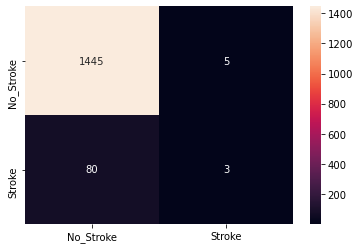

In [137]:
cm=confusion_matrix(y_test,pred1)
ax=plt.subplot()
sns.heatmap(cm,annot=True,fmt='0.7g',ax=ax)
ax.xaxis.set_ticklabels(['No_Stroke','Stroke'])
ax.yaxis.set_ticklabels(['No_Stroke','Stroke'])
plt.savefig("Stroke_Confusion_matrix_catplot_Seaborn_Python.png", dpi=100)

In [138]:
model2=MLPClassifier(solver='sgd',alpha=1e-5,hidden_layer_sizes=(10,10),random_state=1)
model2.fit(X_train,y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10), random_state=1,
              solver='sgd')

In [139]:
pred2=model2.predict(X_test)
pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [140]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.95      0.92      1533



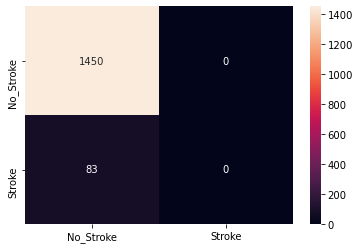

In [141]:
cm=confusion_matrix(y_test,pred2)
ax=plt.subplot()
sns.heatmap(cm,annot=True,fmt='0.7g',ax=ax)
ax.xaxis.set_ticklabels(['No_Stroke','Stroke'])
ax.yaxis.set_ticklabels(['No_Stroke','Stroke'])
plt.savefig("2model_Stroke_Confusion_matrix_catplot_Seaborn_Python.png", dpi=100)